In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib

<!-- requirement: small_data/flights14.csv -->

`Matplotlib` lets you plot things, and `matplotlib.pyplot` is a layer on top of it to give it a `MATLAB`-like syntax. You can make illustrations ranging from simple line plots to complicated combinations of different plotting primitives.  `Matplotlib` is great for static academic illustrations.  For more interactive plots check out a package like `Bokeh`.

`Matplotlib` operates with a wide set of default settings for the way things should look (for example, the width of a plotted line), but is also extremely customizable by way of optional arguments and keyword arguments to most of the plotting functions.  As we work through examples, keep an eye out for these arguments.

### The anathomy of matplotlib
.

<img src="matplotlib anat.png" width="600">

### Line plot
Matplotlib can do basic X-Y plots if you give it the `x` and `y` data of equal length.  Here is a plot of a few sample paths of Brownian Motion.

Notice that calling `plt.plot` multiple results in multiple lines on the same figure.  Call `plt.figure` to create a new figure.

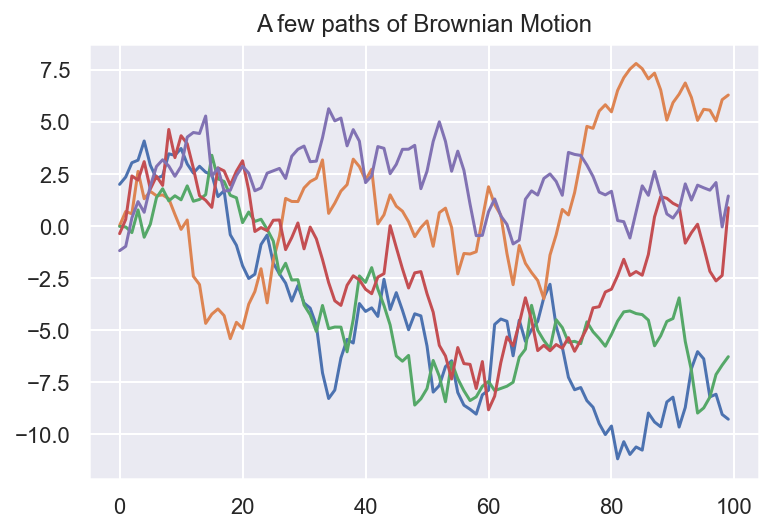

In [3]:
# Line plot example
xs = np.random.randn(5, 100)

plt.title("A few paths of Brownian Motion")
bms = xs.cumsum(1)
for bm in bms:
    plt.plot(bm) # [0,...,N-1] is used for x when only y data is specified 

Cool example!  But we should really always have labels on our plots, so let's add a label for the x and y axis.  We can do this with the `xlabel` and `ylabel` commands.  

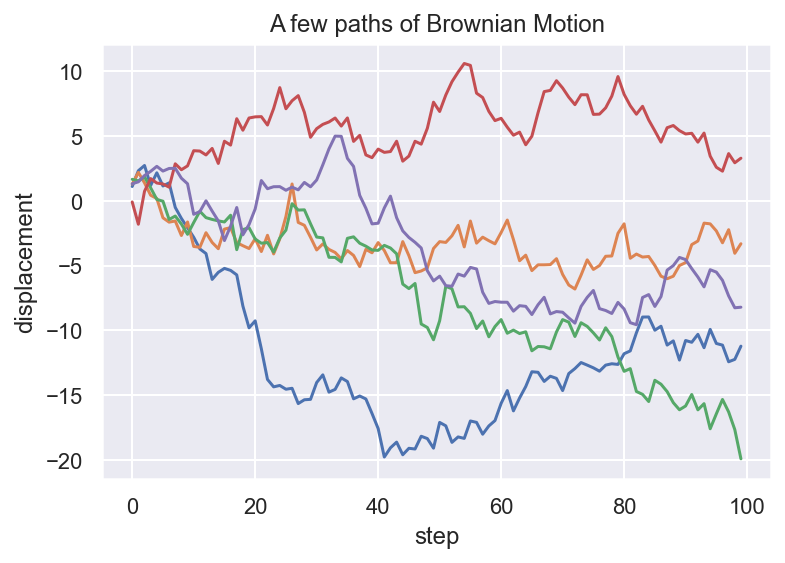

In [4]:
# Line plot example
xs = np.random.randn(5, 100)

plt.title("A few paths of Brownian Motion")
bms = xs.cumsum(1)
for bm in bms:
    plt.plot(bm)
plt.xlabel('step')
plt.ylabel('displacement');

Our plot is getting much nicer, but we often want to add labels to the individual lines and gather these into a legend.  The easiest way to do this is to provide a `label` argument to each `plt.plot` command and then use the `plt.legend()` function which will find all the labels for the plotted lines and format this into a legend.

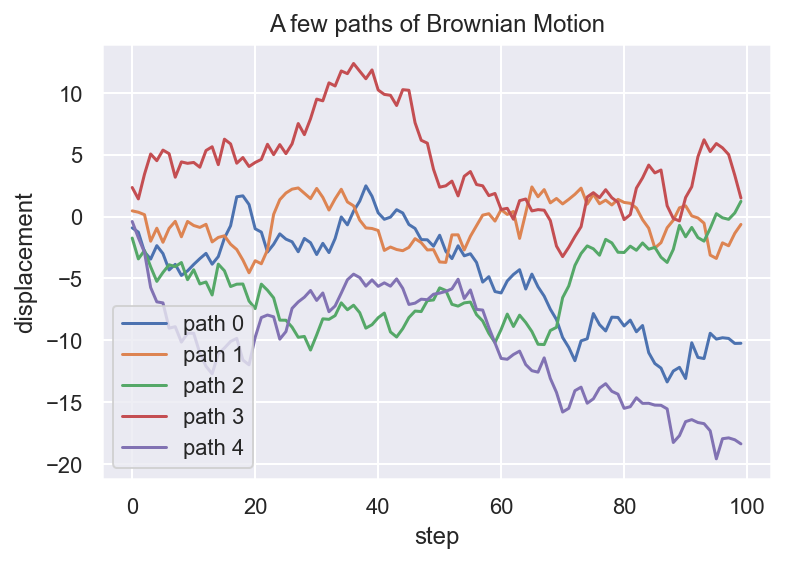

In [5]:
# Line plot example
xs = np.random.randn(5, 100)

plt.title("A few paths of Brownian Motion")
bms = xs.cumsum(1)
for i, bm in enumerate(bms):
    plt.plot(bm, label='path {}'.format(i))
plt.xlabel('step')
plt.ylabel('displacement')
plt.legend(loc='best')

### Scatter plot
`Matplotlib` can generate 2D scatter plot data. Just like the `plt.plot` function, the `plt.scatter` function takes in two arrays (or lists) of equal length and plots them as `x,y` coordinates.  We can also pass in a few other parameters, namely `c` which is an array to control the color of each point and `s` an array to control the size of each point.

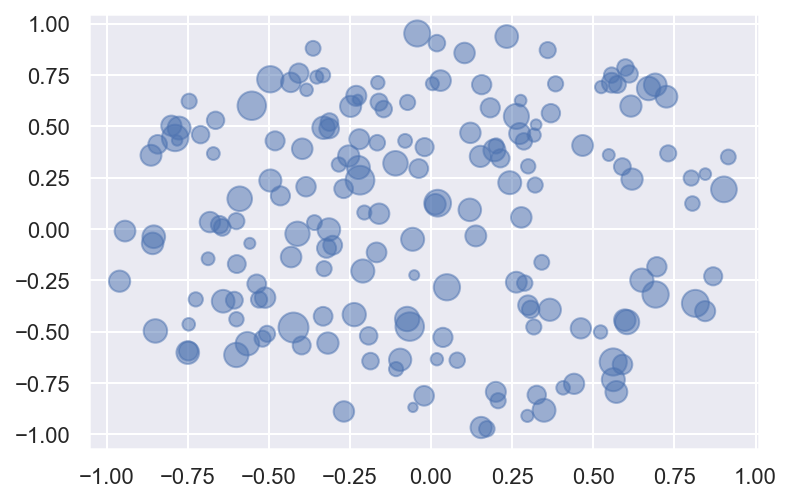

In [6]:
# Generate randomly sampled dots within the unit circle, with gamma-distributed radius
N=250
A=20
xo,yo = np.random.uniform(low=-1, high=1, size=N), np.random.uniform(low=-1, high=1, size=N)
so = A*np.random.gamma(4.5, 1.0, size=N)

x = xo[xo**2+yo**2 < 1]
y = yo[xo**2+yo**2 < 1]
s = so[xo**2+yo**2 < 1]

# Scatter plot, with _s_izes and translucent circles
plt.scatter(x, y, s=s, alpha=0.5)

### Histograms
`Matplotlib` can also plot histograms from raw count data.  They are a useful way of looking at distributions of data.  A `histogram` can be made with the `plt.hist` function.  This function returns three things, the histogram values, the edges of the bins and the patches or list of patches used for the histogram.

Let's try this with a `gamma` distribution.

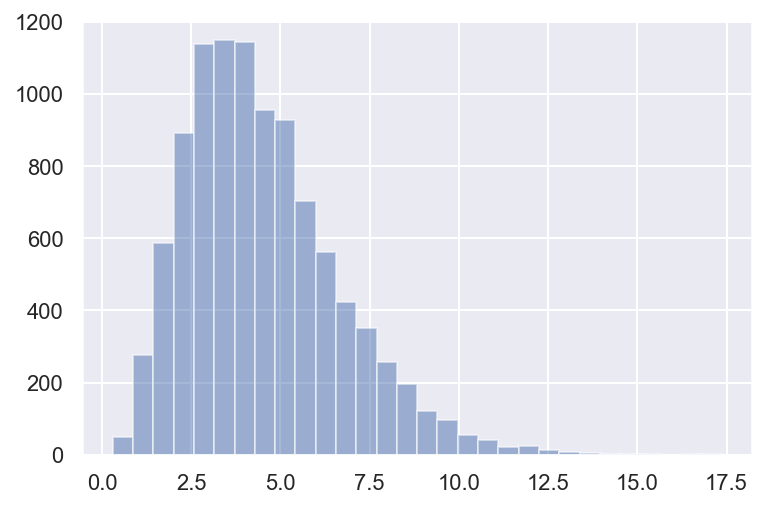

In [9]:
data = np.random.gamma(shape=4.5,scale=1.0,size=10000)
hplt=plt.hist(data, bins=30, alpha=.5)

In [10]:
hplt

(array([4.900e+01, 2.750e+02, 5.880e+02, 8.920e+02, 1.138e+03, 1.149e+03,
        1.145e+03, 9.560e+02, 9.290e+02, 7.030e+02, 5.620e+02, 4.220e+02,
        3.500e+02, 2.580e+02, 1.950e+02, 1.210e+02, 9.700e+01, 5.500e+01,
        4.000e+01, 2.000e+01, 2.400e+01, 1.200e+01, 6.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([ 0.30162968,  0.87024909,  1.43886851,  2.00748793,  2.57610735,
         3.14472676,  3.71334618,  4.2819656 ,  4.85058502,  5.41920443,
         5.98782385,  6.55644327,  7.12506269,  7.6936821 ,  8.26230152,
         8.83092094,  9.39954036,  9.96815977, 10.53677919, 11.10539861,
        11.67401803, 12.24263744, 12.81125686, 13.37987628, 13.9484957 ,
        14.51711511, 15.08573453, 15.65435395, 16.22297337, 16.79159278,
        17.3602122 ]),
 <BarContainer object of 30 artists>)

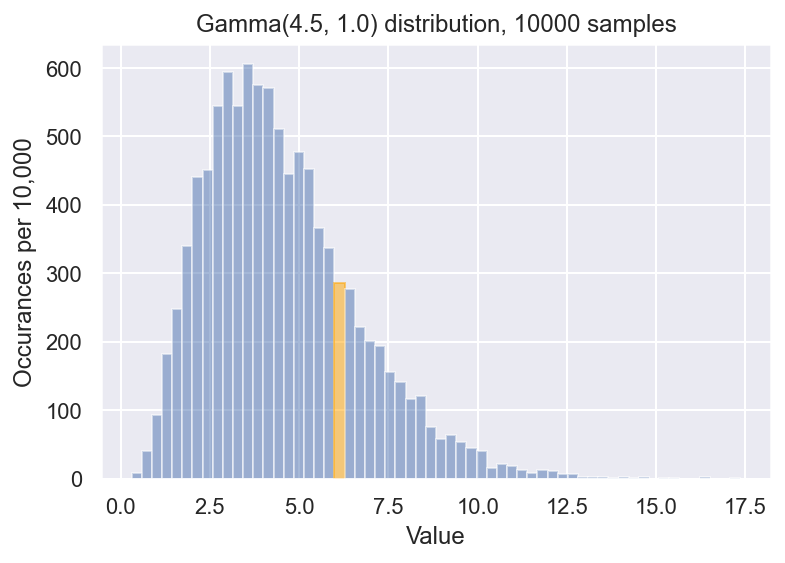

In [11]:
n, bins, patches = plt.hist(data, bins=60, alpha=.5)
patches[20].set_color('orange')
plt.title("Gamma(4.5, 1.0) distribution, 10000 samples")
plt.xlabel("Value")
plt.ylabel("Occurances per 10,000");

Now we can look at the counts and the bins

One reason we might want to know the bins is to plot two histograms with the same bins

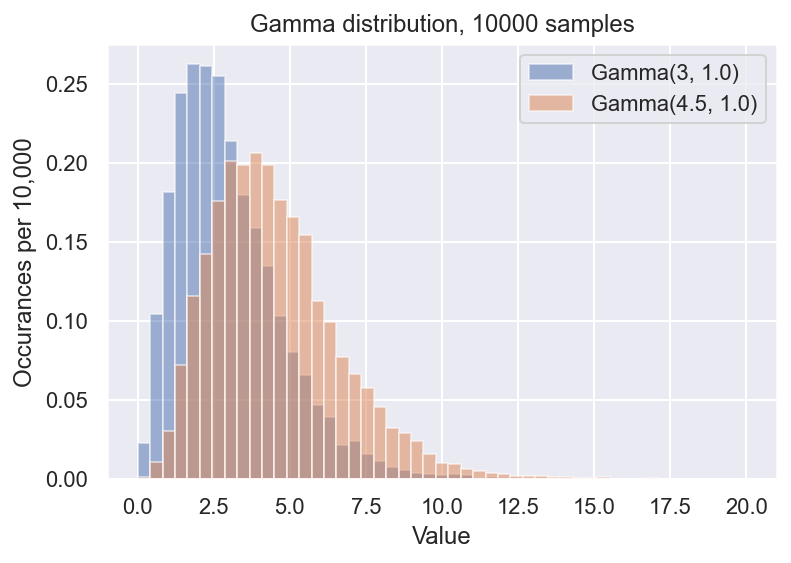

In [17]:
bins = np.linspace(0, 20, 50)
for gamma in [3, 4.5]:
    data = np.random.gamma(gamma, 1.0, 10000)
    n, bins, patches = plt.hist(data, bins=bins, 
                                alpha=.5, 
                                density=True,
                                label="Gamma({}, 1.0)".format(gamma))
plt.title("Gamma distribution, 10000 samples")
plt.legend(loc='best')
plt.xlabel("Value")
plt.ylabel("Occurances per 10,000")
plt.show()

You might have noticed we have been adjusting the images opacity through use of the `alpha` keyword argument, this is because histograms tend to look better when they are not opaque and this is particularly true when we have multiple histograms on the same plot.

### Images
`Matplotlib` can plot arrays as 2D images, using a color map that you specify.  Conventionally, we represent images with the origin placed at the upper left instead of lower left corner, so watch out! 

Text(0, 0.5, 'y')

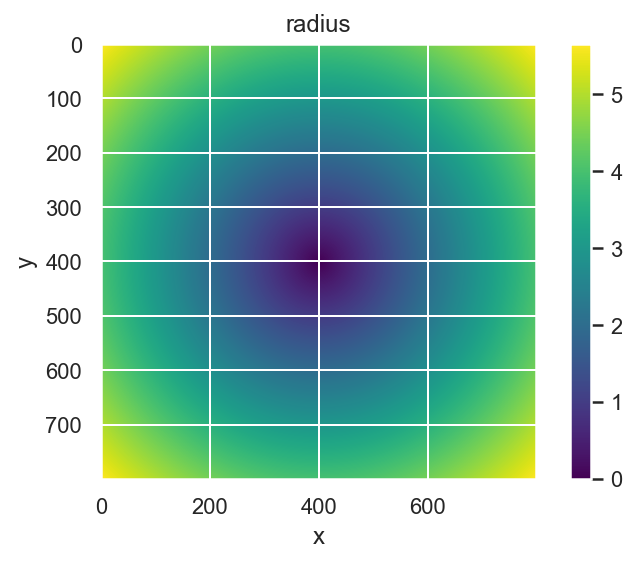

In [18]:
a = np.arange(-4, 4, 0.01)

x, y = np.meshgrid(a, a)
assert(x.shape == (len(a), len(a)))
r = np.sqrt(x ** 2 + y ** 2)
plt.imshow(r, cmap=plt.cm.viridis)
plt.colorbar()
plt.title("radius")
plt.xlabel("x")
plt.ylabel("y")

## Matplotlib and Pyplot
You'll notice that all of the plots created thus far started with `plt.` That references this import at the top of the notebook:

```python
import matplotlib.pyplot as plt
```

Pyplot is a special plotting "state machine" created for Matplotlib to simplify the creation of plots. Basically, it has an internal concept of the current chart being operated on by the set of methods made available to you. It is a wrapper around Matplotlib's object oriented plotting library.

For the previous plot, we could have created it like this:

Text(0, 0.5, 'y')

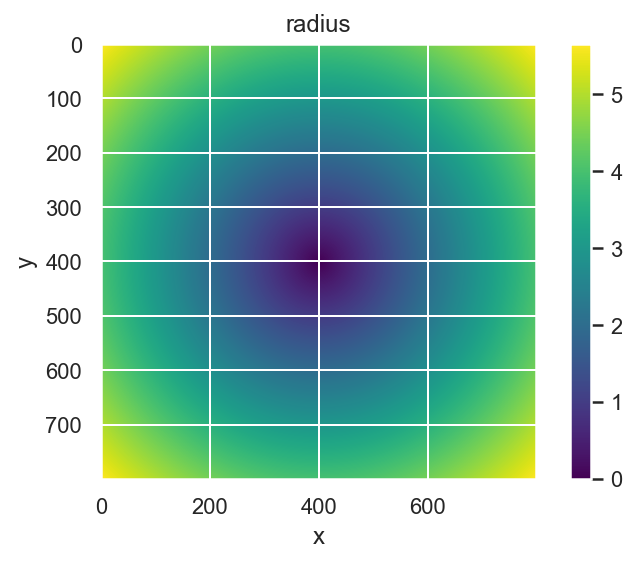

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(r, cmap=plt.cm.viridis)
fig.colorbar(ax.get_images()[0])
ax.set_title("radius")
ax.set_xlabel("x")
ax.set_ylabel("y")

This approach is more typing but it exposes some of the hidden complexity in `pyplot`. There are figure and axis objects and each has methods that contribute to the result.

One approach is not necessarily better than the other, but it is important to know that there is a `pyplot` state machine that creates plots and there is a separate object oriented approach for creating plots.

Later in your Python adventures you will see sample Matplotlib code on the Internet and will want to use it to add features to your data visualizations. The sample code might not easily fit the code you have already written if one is using `pyplot` and the other is not.

To help you with this, `pyplot` provides the `gcf` and `gca` methods. You can use these to get `pyplot`'s current figure or axis objects.

### Matplotlib subplots
Frequently you will want 2 or more plots in the same figure. You can do that with the subplot command.

A common way of creating subplots is with a 3 digit number. The hundreds digit represents the number of rows, the tens digit represents the number of columns, and the ones digit represents the current chart. You call this repeatedly to move from one subplot to the next.

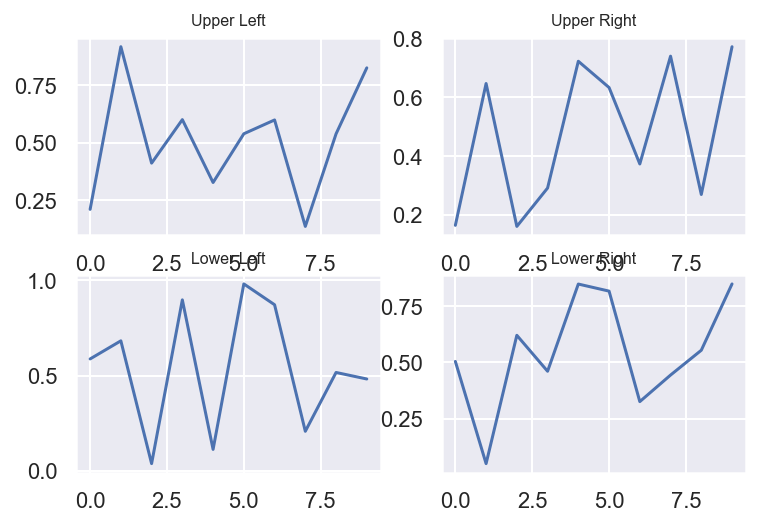

In [20]:
# create a 2x2 subplot grid, and prepare to plot data into the first subplot.
plt.subplot(2, 2, 1)
plt.title('Upper Left',fontsize=8)
plt.plot(np.random.rand(10))

# move to the second subplot
plt.subplot(2, 2, 2)
plt.title('Upper Right',fontsize=8)
plt.plot(np.random.rand(10))

# move to the third
plt.subplot(2, 2, 3)
plt.title('Lower Left',fontsize=8)
plt.plot(np.random.rand(10))

# move to the last subplot
plt.subplot(2, 2, 4)
plt.title('Lower Right',fontsize=8)
plt.plot(np.random.rand(10))

These plots look a bit squeezed together, if we want to make them a bit more clean, we can force `Matplotlib` to lay them out in a better format with the `plt.tight_layout()` function.

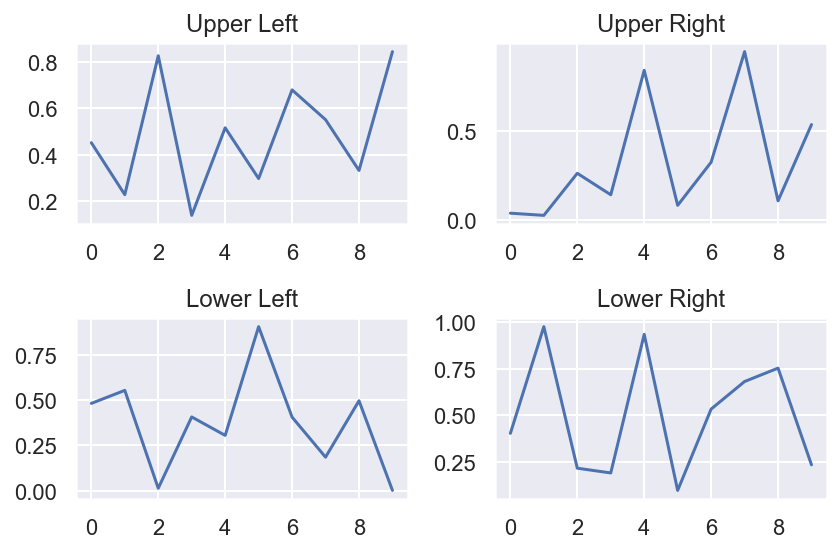

In [21]:
# create a 2x2 subplot grid, and prepare to plot data into the first subplot.
plt.subplot(2, 2, 1)
plt.title('Upper Left')
plt.plot(np.random.rand(10))

# move to the second subplot
plt.subplot(2, 2, 2)
plt.title('Upper Right')
plt.plot(np.random.rand(10))

# move to the third
plt.subplot(2, 2, 3)
plt.title('Lower Left')
plt.plot(np.random.rand(10))

# move to the last subplot
plt.subplot(2, 2, 4)
plt.title('Lower Right')
plt.plot(np.random.rand(10))

#plt.subplots_adjust(hspace=0.4,wspace=0.4,left=0.8)
plt.tight_layout()

## Matplotlib plots from Pandas
The Pandas library comes with built-in plotting tools. Data stored in a DataFrame can be plotted just as easily as the previous examples.

In [22]:
import pandas as pd

Let's make a `DataFrame` with some random data, we can then use it to make some nice plots.

In [23]:
test_data = pd.DataFrame(np.random.rand(10, 2),
                      index=np.arange(10),
                      columns=['A', 'B'])
test_data

,A,B
0,0.539104,0.088156
1,0.717973,0.837274
2,0.174041,0.380831
3,0.978453,0.865396
4,0.316220,0.645807
5,0.601078,0.044045
6,0.285244,0.599421
7,0.032516,0.153205
8,0.290773,0.381048
9,0.636373,0.001769


`DataFrame` objects have a few plotting methods, each one of them makes some assumptions about the type of data generally stored in a `DataFrame` (namely structured, tabular data) and thus can make a decent looking plot with effectively zero configuration.

For example, when we call the `plot` method, notice that it automatically adds a legend with the column names.

<AxesSubplot:>

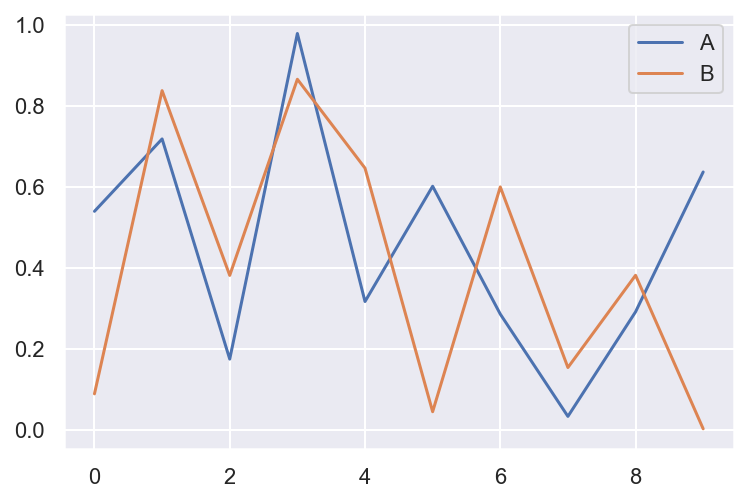

In [24]:
test_data.plot()

By default, it assumes you would like to see a line chart. Other choices are available.  Perhaps we want a bar chart:

<AxesSubplot:>

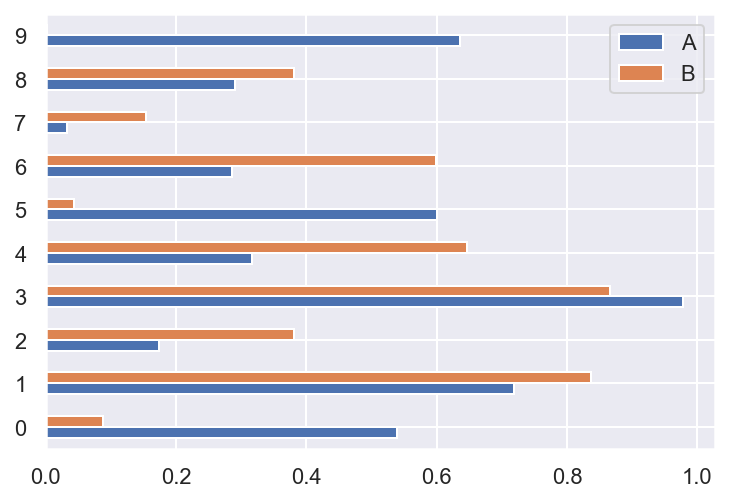

In [26]:
test_data.plot.barh()

Just like in `Matplotlib`, we can pass parameters to the `bar` method to adjust the chart, here let's use a stacked chart and color things blue and red.

<AxesSubplot:>

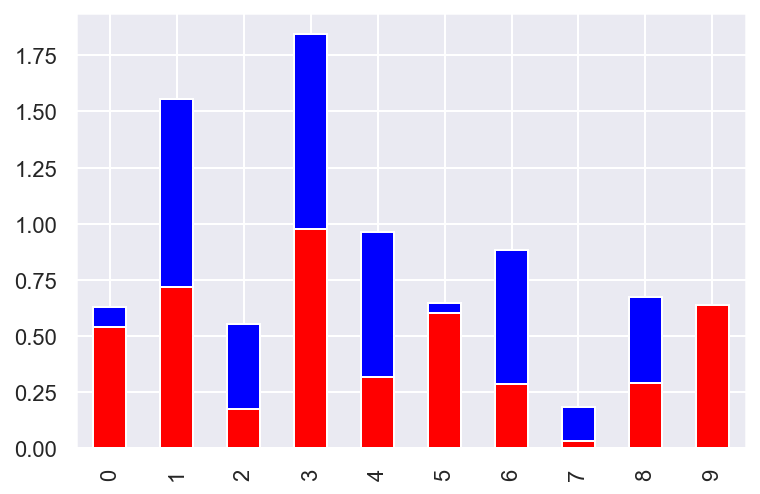

In [27]:
test_data.plot.bar(stacked=True, color=['red', 'blue'], legend=False)

These plots can be useful for visually inspecting your data and general exploratory data analysis.

As we have already seen, a histogram is particularly helpful for understanding the range and distribution of your data. Outliers will be visible, as well as potential data errors.

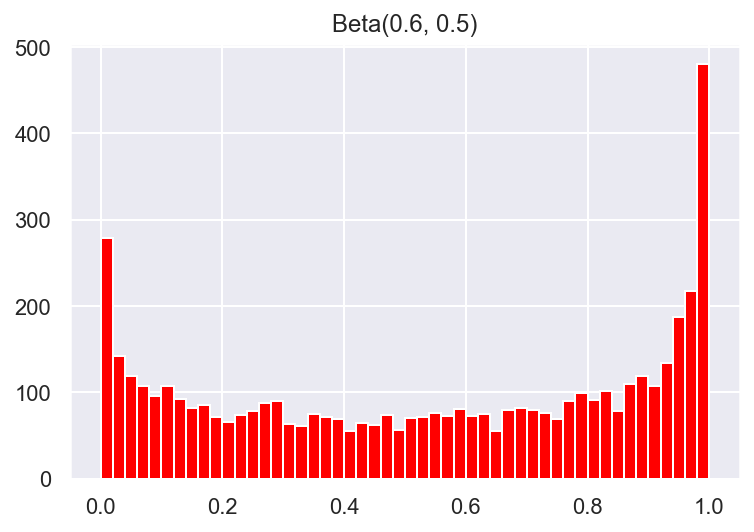

In [29]:
test_hist = pd.DataFrame(np.random.beta(0.6, 0.5, size=5000),
                      columns=['Beta(0.6, 0.5)'])

test_hist.hist(bins=50, color='red');

One of the great features of Pandas and plotting is how it handles dates.

In [30]:
import pandas.util.testing as pd_testing

#it creates a dummy dataframe with random real number of 4 columns A,B,C,D, and using date as index
time_df = pd_testing.makeTimeDataFrame(50).cumsum()

time_df.head()

<ipython-input-30-1a54d3dac55e>:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pd_testing


,A,B,C,D
2000-01-03,1.002771,-0.538201,-0.603075,1.065062
2000-01-04,2.291941,-0.438214,0.648882,1.354934
2000-01-05,4.041063,-2.190256,0.626432,1.892898
2000-01-06,4.289679,-1.054151,0.721277,1.752284
2000-01-07,5.116893,-0.842744,-1.541592,2.788621


This DataFrame has dates in the index. Pandas tries to figure out an intelligent way of arranging the x axis so the labels look pretty.

<AxesSubplot:>

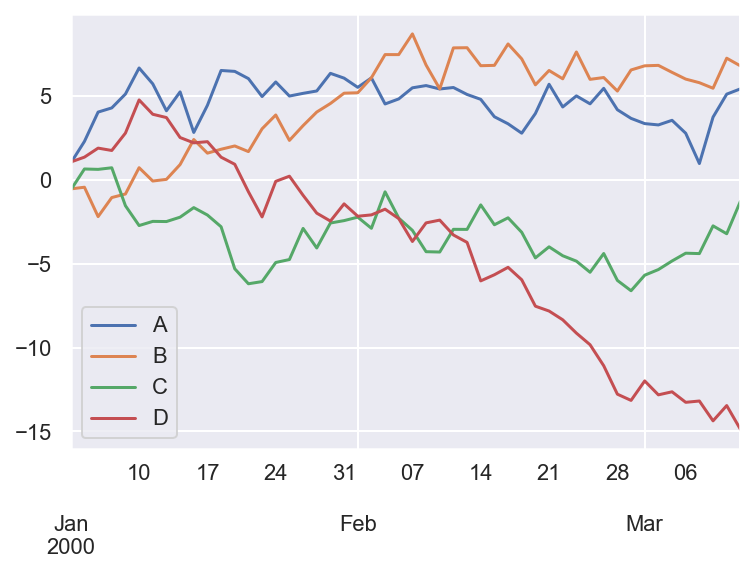

In [31]:
time_df.plot()

### `Matplotlib` in and out of `Jupyter` Notebooks

You have may have noticed that our plots appear directly in the notebook, which is extremely useful for most forms of exploratory data science.  We can achieve this through the use of the `%matplotlib inline` magic which you might notice we use in the top cell of most of our notebooks.  Often this is enough, but when we want to use `Matplotlib` outside of the notebooks, the usage is slightly different.  Instead of figures appearing after the end of a cell, they appear only after the `plt.show()` function is executed.  This creates a separate window with an interactive plot.  To try it, run the following code in a python interpreter within a desktop environment (sadly not our `Jupyterhub` environment).

```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 20)
y = x ** 2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
```

Both in and out of a notebook we can save the figures we create to disk, through the `plt.savefig` command.  This takes in a string for the location on disk to place the saved figure and will inspect the extension to use the correct format.  For example, let's run the previous code and save it as a `png` file.

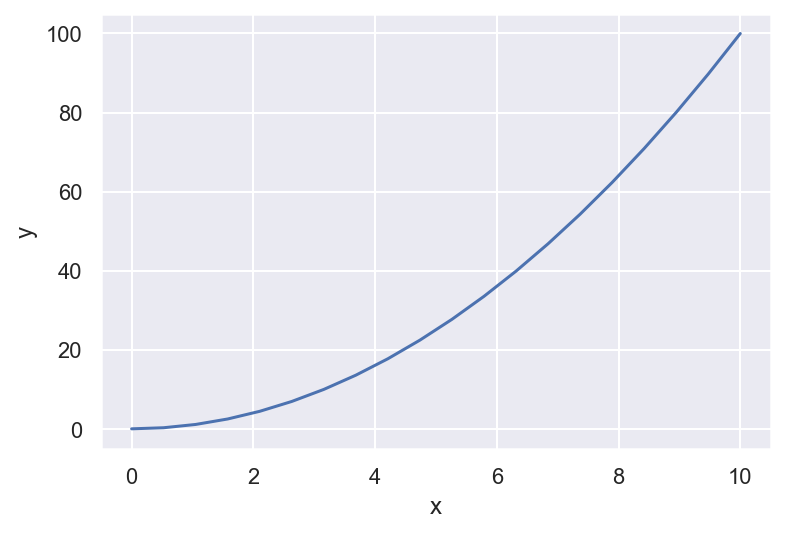

In [32]:
x = np.linspace(0, 10, 20)
y = x ** 2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('example_plot.png')

Let's look at this image.

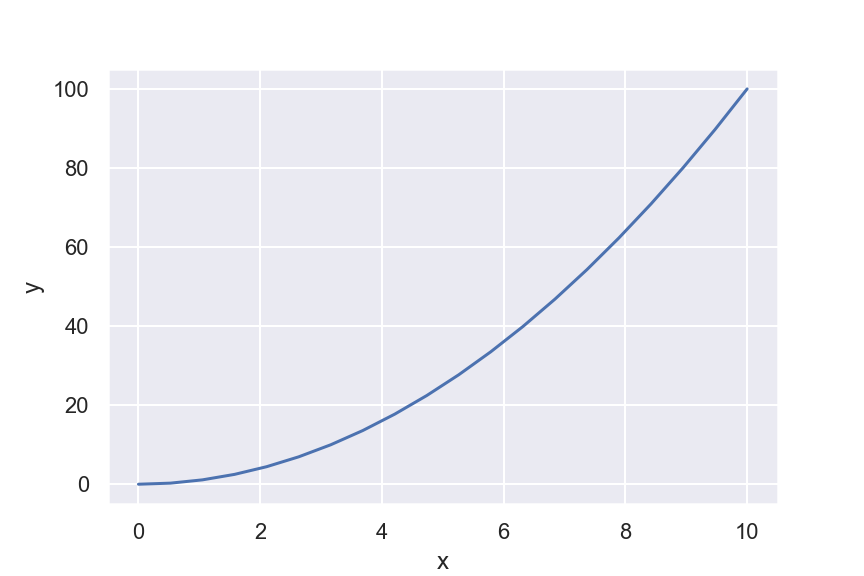

In [33]:
from IPython import display
display.Image('example_plot.png')

We can also save a host of other file formats like `jpg` and `pdf`.  One common issue can be seen with the following plot where we rotate the labels so that they are readable.

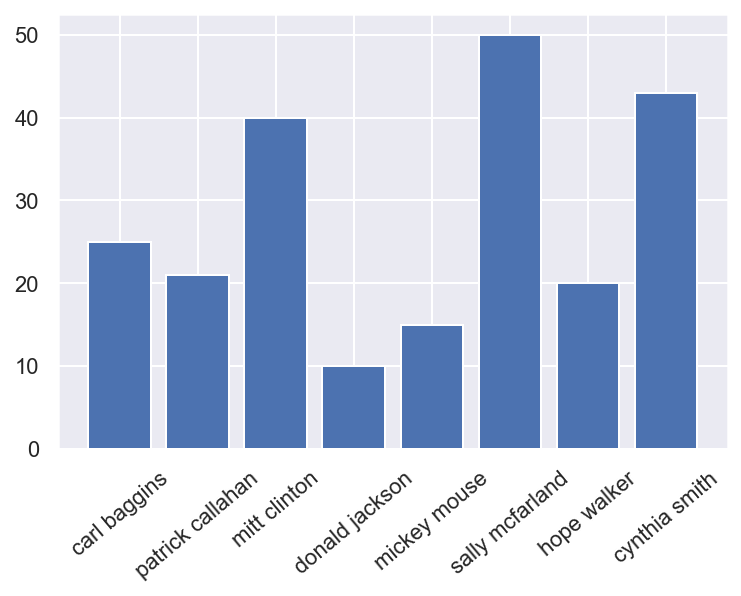

In [37]:
def gen_plot():
    labels = ['carl baggins', 
              'patrick callahan', 
              'mitt clinton', 
              'donald jackson',
              'mickey mouse',
              'sally mcfarland',
              'hope walker',
              'cynthia smith']
    data = [25, 21, 40, 10, 15, 50, 20, 43]
    plt.bar(labels, data)
    plt.xticks(np.arange(len(labels)), labels, rotation=40)

gen_plot()
plt.savefig('bar.png', dpi=250)

If we look at the image, we can see some of the text is cut off.

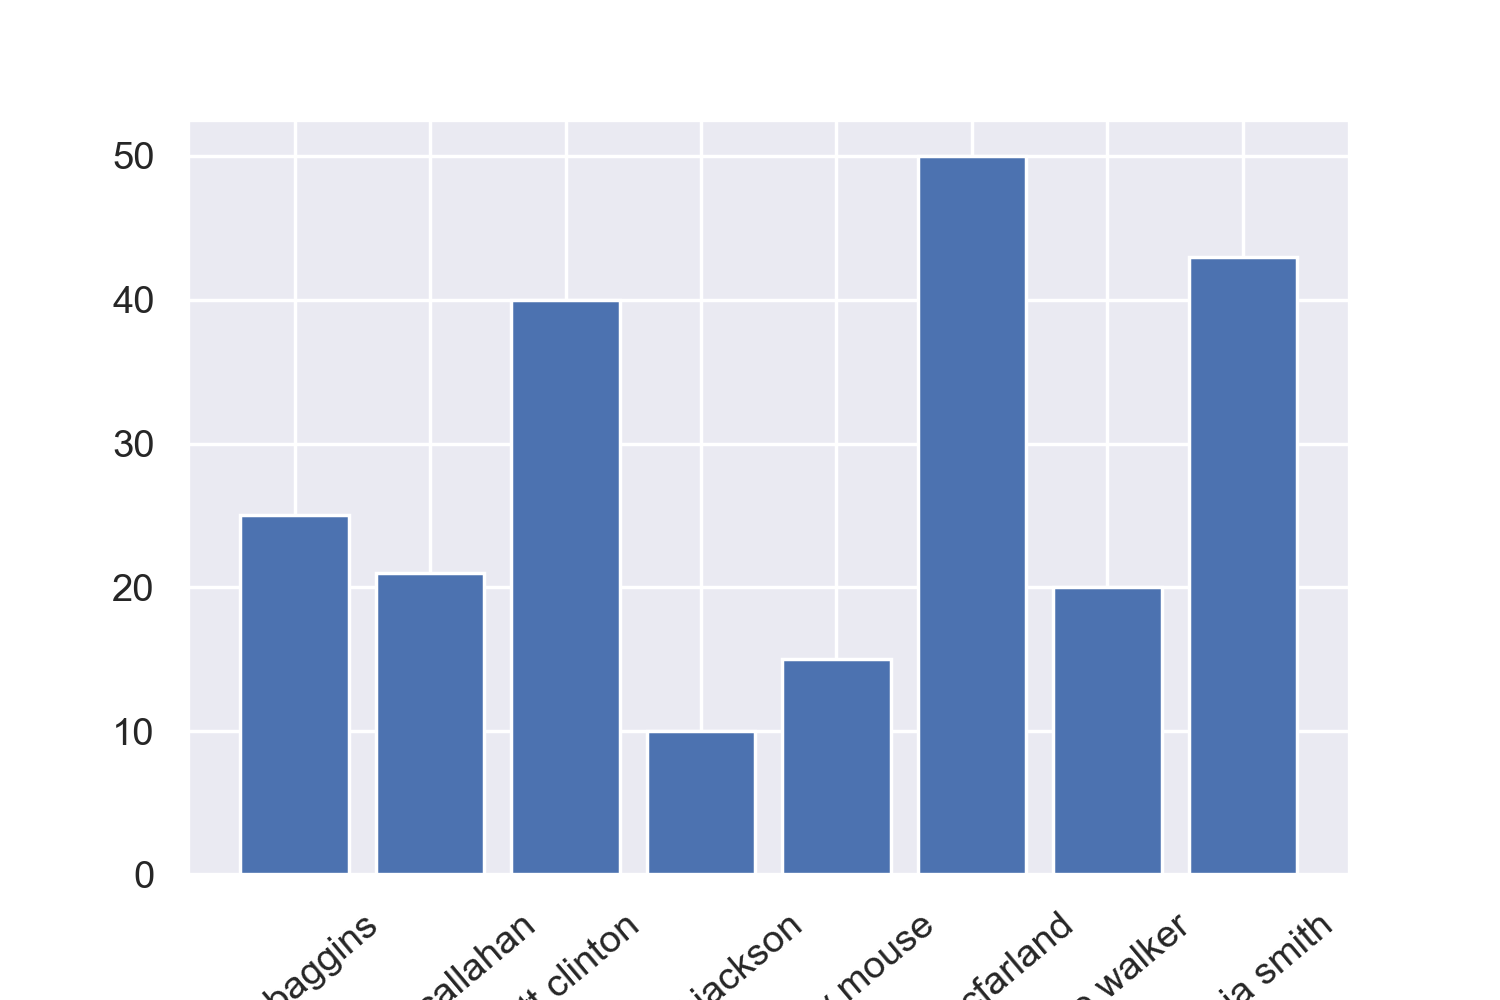

In [38]:
display.Image('bar.png')

In order to fix this, we can generate the plot again and then save it with the `bbox_inches` keyword argument.

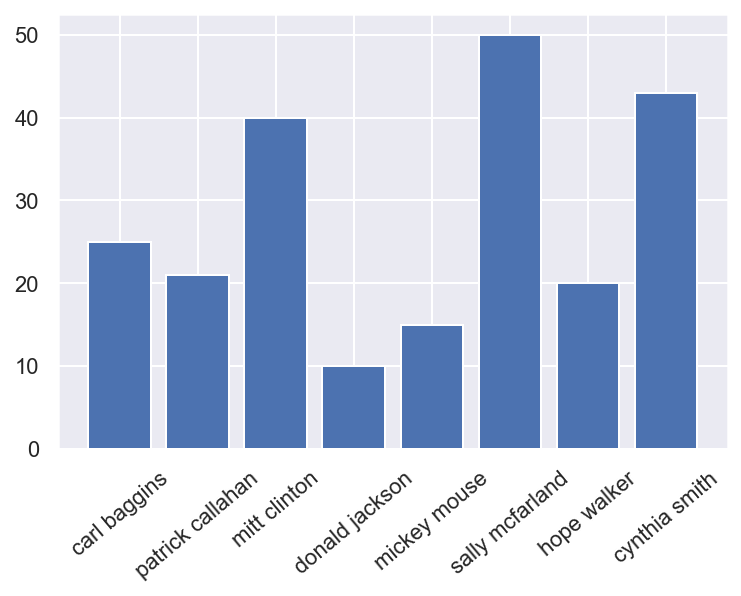

In [39]:
gen_plot()
plt.savefig('bar_fixed.png', dpi=250, bbox_inches='tight')

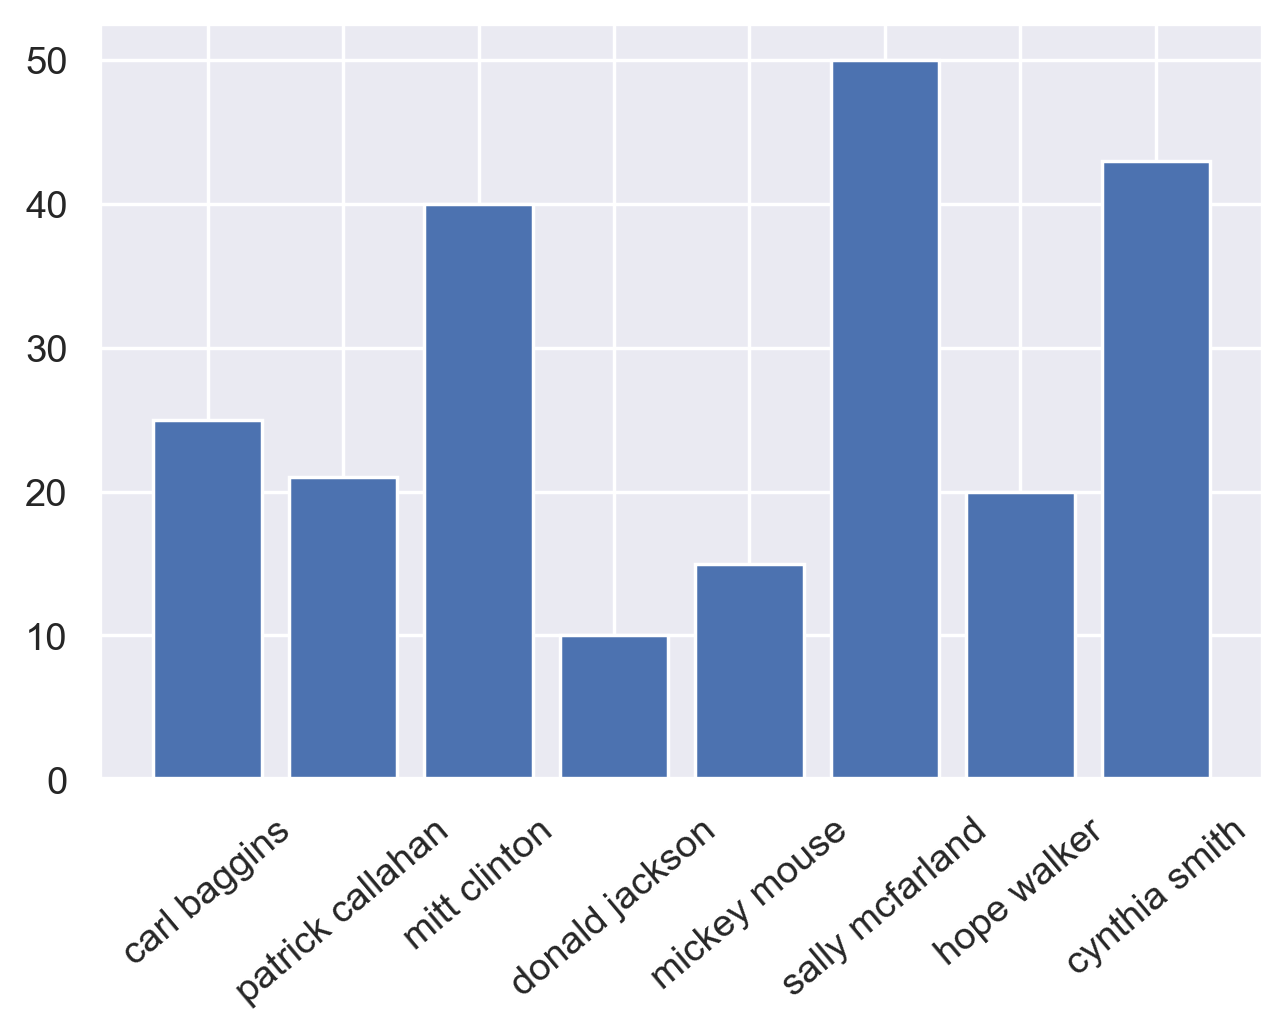

In [40]:
display.Image('bar_fixed.png')

### Control the color and grids

In [41]:
import seaborn as sns # just for the dataset

df_iris = sns.load_dataset('iris') 
print(df_iris.head()) 
color_int=150*[0]
for i in range(150):
    if df_iris.iloc[i]['species'] == 'versicolor': color_int[i] = 1
    elif df_iris.iloc[i]['species'] == 'virginica': color_int[i] = 2

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


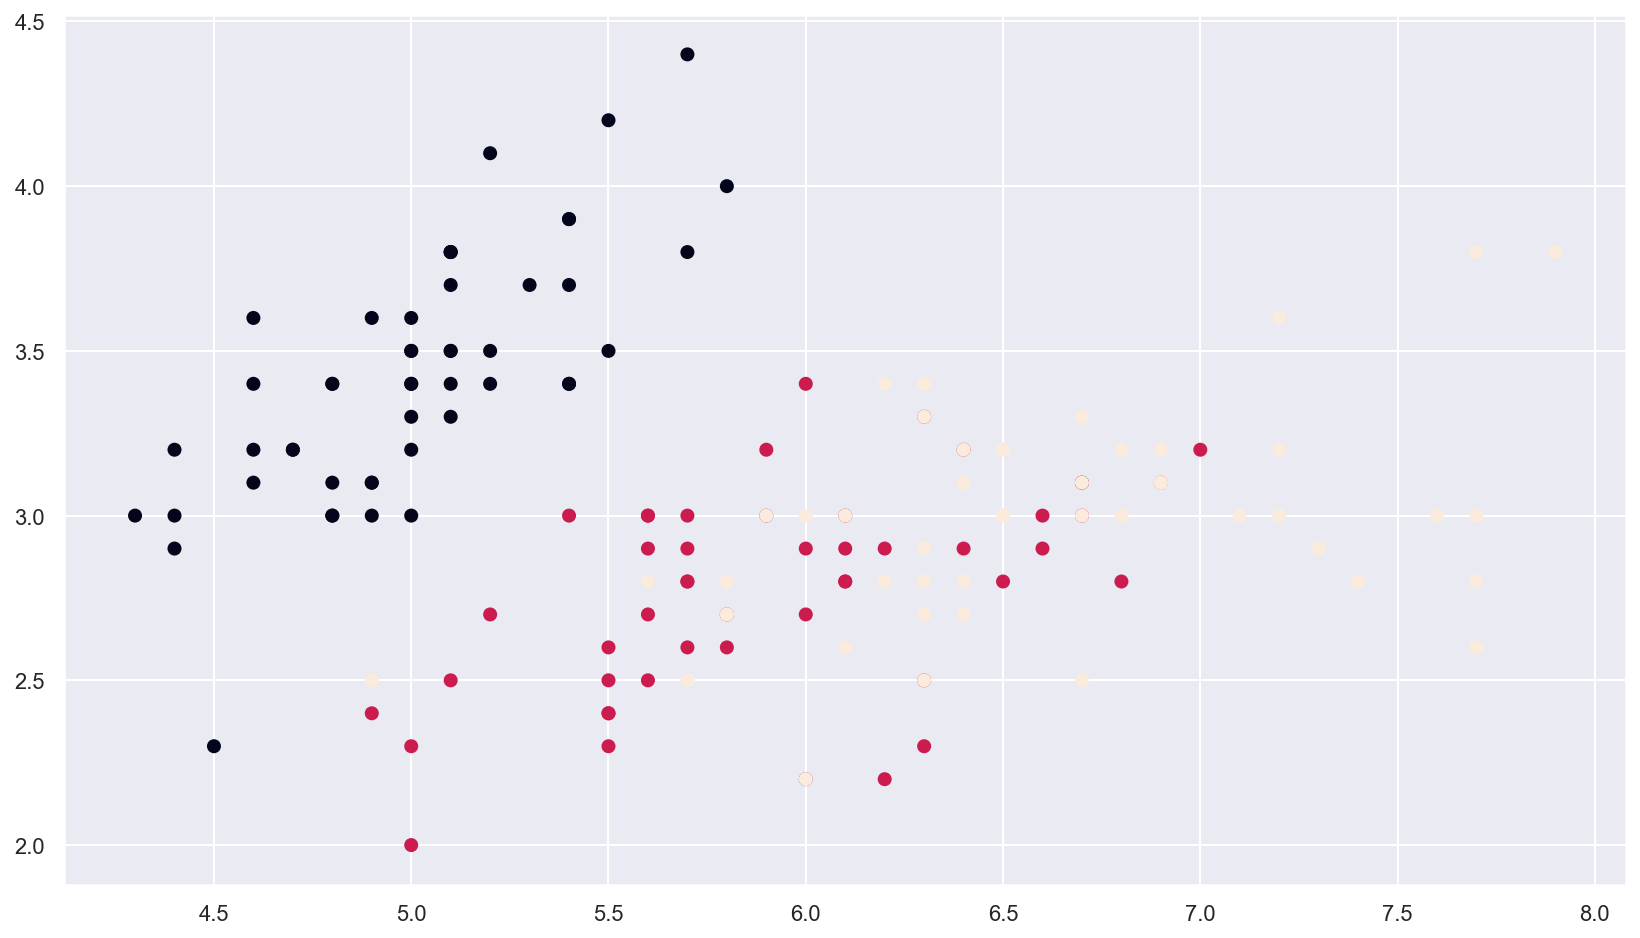

In [42]:
fig1 = plt.figure(figsize=(14,8),num=61) 
ax1 = fig1.gca() 
ax1.scatter(df_iris['sepal_length'],df_iris['sepal_width'], c=color_int) 
plt.show()
        
ax1.grid(b=True, which='major', color='red',linestyle='-')
# Show the minor grid lines with very faint and # almost transparent grey lines ax1.minorticks_on()
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='red', linestyle='-', alpha=0.2)

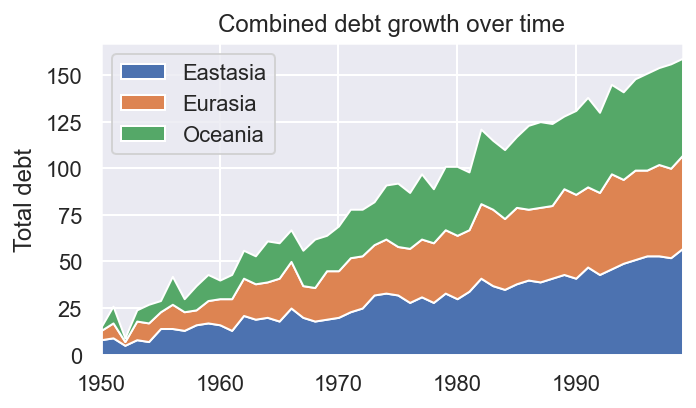

In [43]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

### More examples on using subplots ###

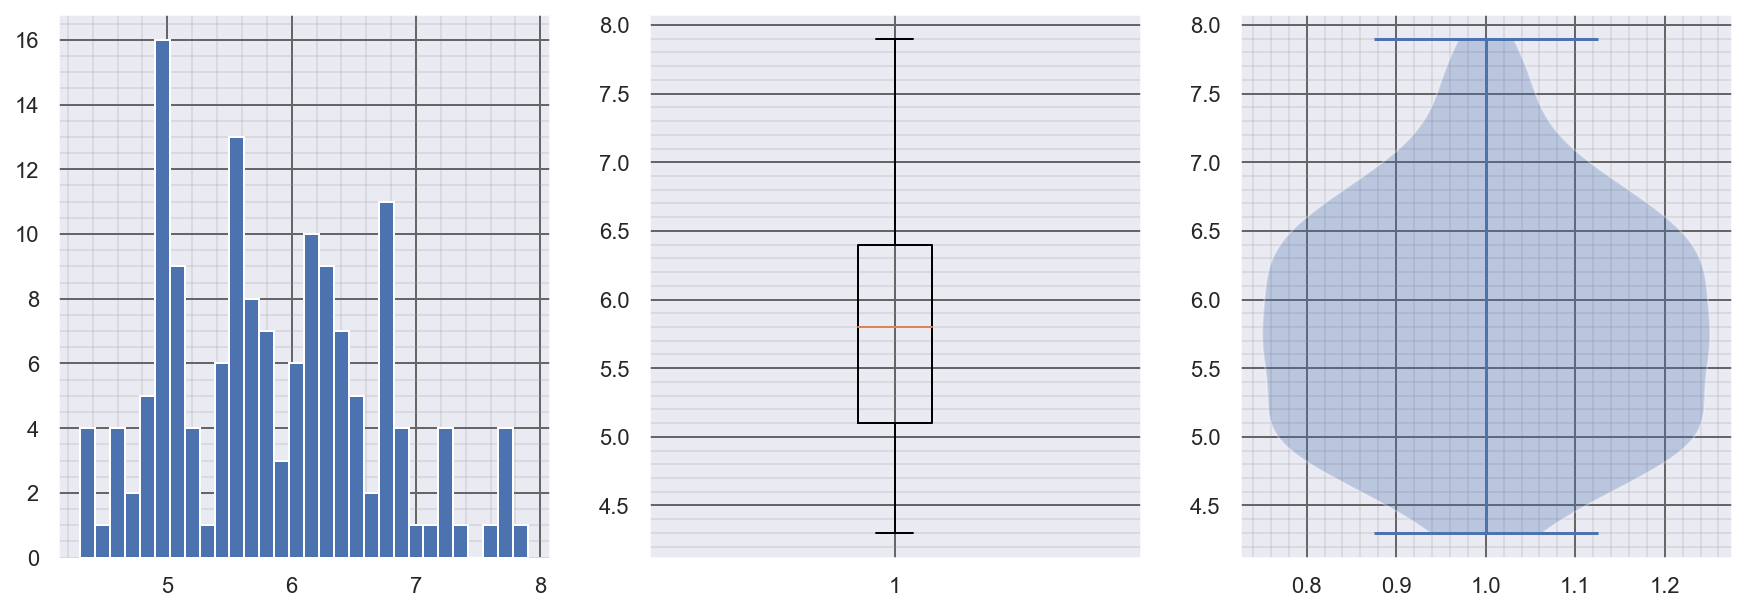

In [44]:
fig2, ax2 = plt.subplots(1,3,figsize=(15,5),num=62) 
ax2[0].hist(df_iris['sepal_length'], bins=30) 
ax2[0].grid(b=True, which='major', color='#666666',linestyle='-')
ax2[0].minorticks_on()
ax2[0].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

ax2[1].boxplot(df_iris['sepal_length']) 
ax2[1].grid(b=True, which='major', color='#666666',linestyle='-')
ax2[1].minorticks_on()
ax2[1].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

ax2[2].violinplot(df_iris['sepal_length']) 
ax2[2].grid(b=True, which='major', color='#666666',linestyle='-')
ax2[2].minorticks_on()
ax2[2].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2) 

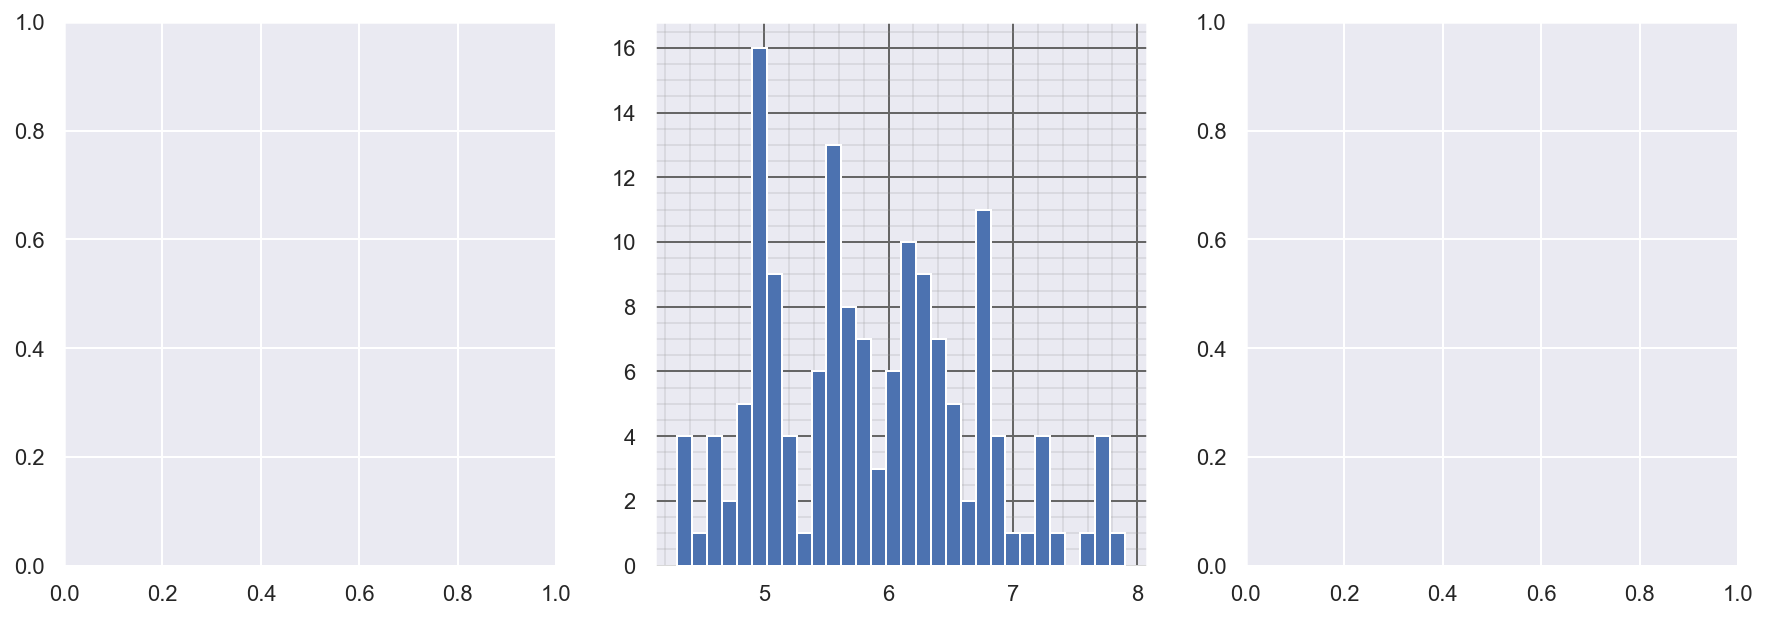

In [47]:
fig2, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5),num=63) 

ax2.hist(df_iris['sepal_length'], bins=30) 
ax2.grid(b=True, which='major', color='#666666',linestyle='-')
ax2.minorticks_on()
ax2.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

Let’s look at an example with multiple subplots (Axes) within one Figure, plotting two correlated arrays that are drawn from the discrete uniform distribution:

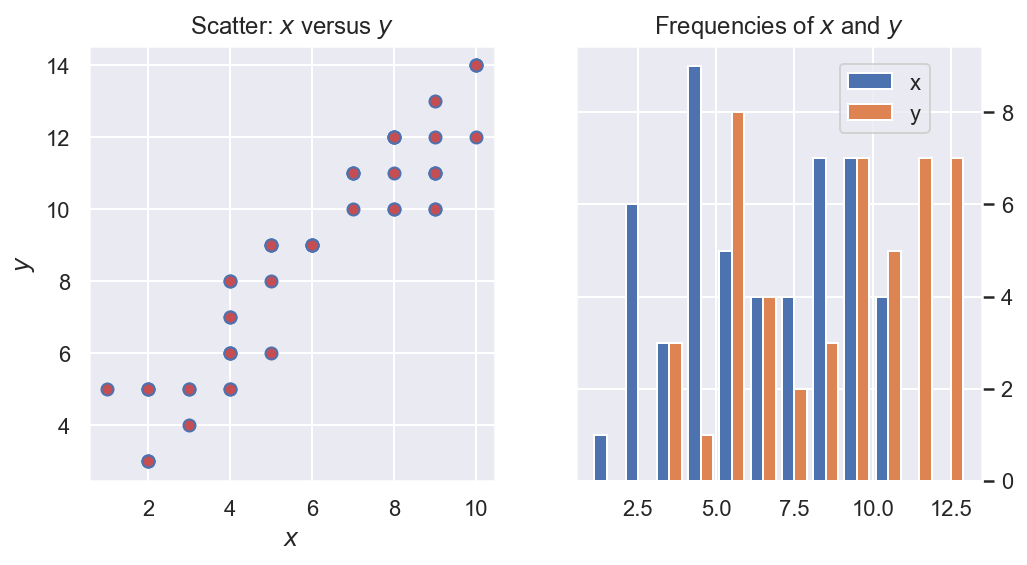

In [48]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

In [49]:
Country=pd.read_csv('Data/Country.csv')
Indicators=pd.read_csv('Data/Indicators.csv')
Series=pd.read_csv('Data/Series.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Country.csv'

In [ ]:
Indicators.head()

In [ ]:
import matplotlib

params = {'axes.titlesize':'6',
          'xtick.labelsize':'4',
          'ytick.labelsize':'4'}
matplotlib.rcParams.update(params)

my_plot=Indicators[Indicators.Year<1970][['Value','Year']].groupby('Year').boxplot()
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)

In [ ]:
grouped=Indicators[Indicators.Year<1970][['Value','Year']].groupby('Year')

ncols=3
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,4), sharey=True)

i=0
for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).boxplot(ax=ax)
    ax.set_title('A')

ax.legend()
plt.show()

In [ ]:
base_dict={'Score':np.random.randint(0,9,100),
          'mode':np.random.choice(['low','high','mean'],100),
          'lon':np.random.rand(100)*5-33,
          'lat':np.random.rand(100)*5+73}

df=pd.DataFrame(base_dict,columns=['Score','mode','lon','lat'])
my_plot=df.hist(by='Score')

In [ ]:
axes = df.hist(by='Score',figsize=(50, 30))
for row in axes:
    for x in row:
        x.set_title('Humidity',fontsize= 30)
        x.set_xlabel('Humidity',fontsize= 30)
        x.set_ylabel('Humidity',fontsize= 30)

### Irregular Grid 

In [50]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')
    
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [51]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
            horizontalalignment='center',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5)
    return ax

<AxesSubplot:>

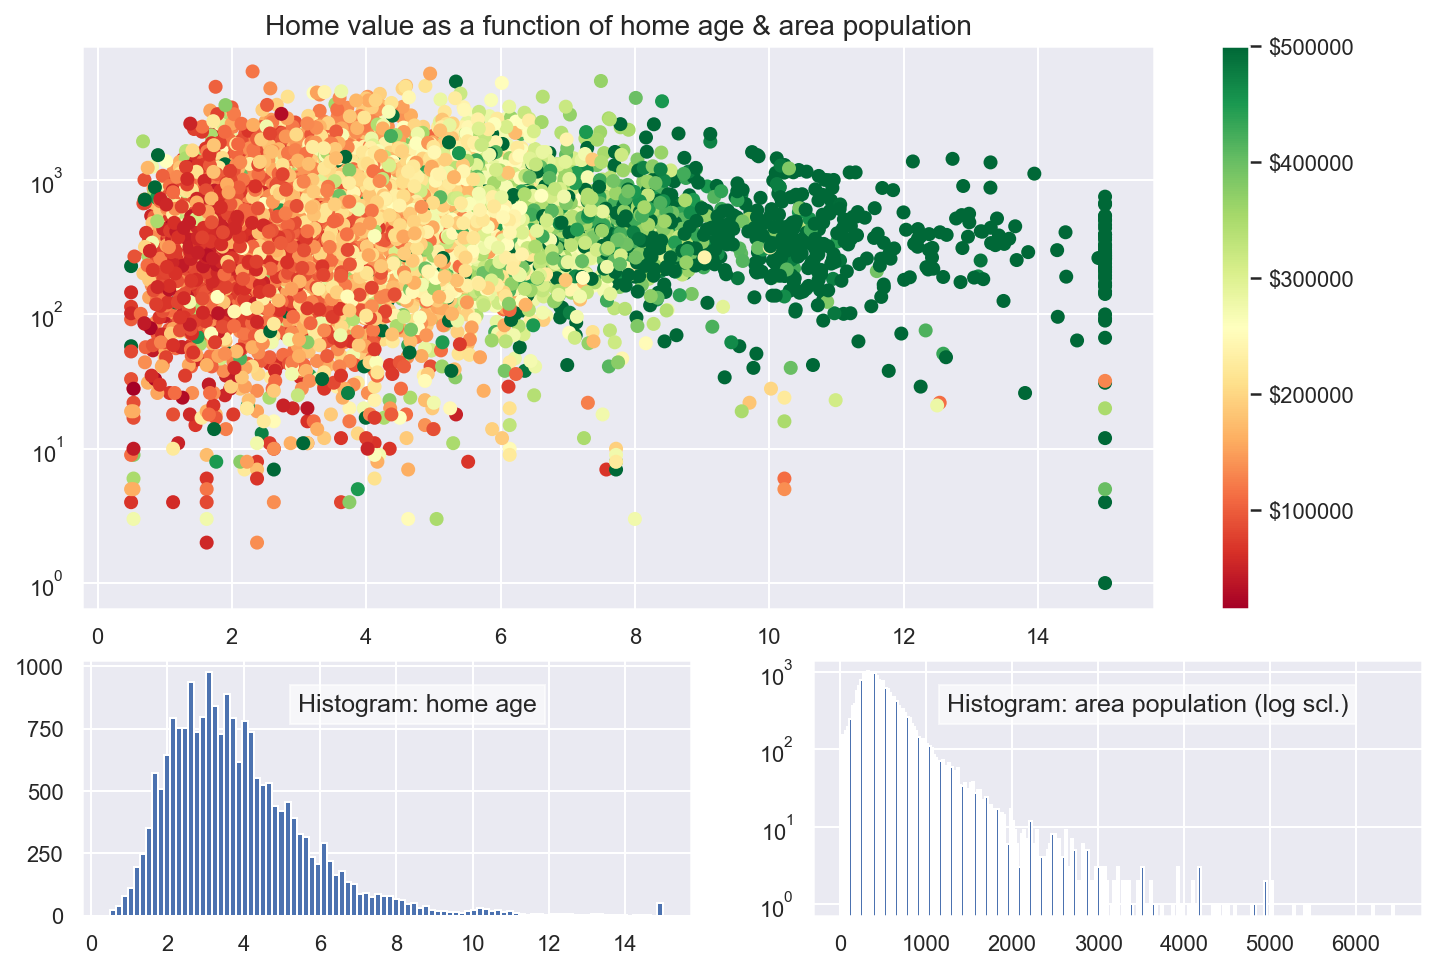

In [52]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

#### what we actually have is a 3x2 grid. ax1 is twice the height and width of ax2/ax3, meaning that it takes up two columns and two rows.

<br>
<img src="irregular.png" width="500">

### First Method to arrange subplots

<bound method Figure.tight_layout of <Figure size 864x576 with 5 Axes>>

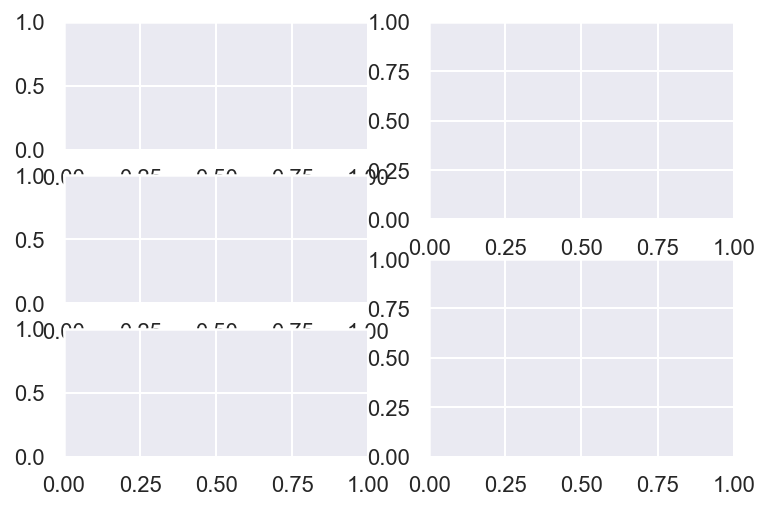

In [66]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(321)
#ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
#ax1 = fig.add_subplot(324)
ax3 = fig.add_subplot(325)
#ax1 = fig.add_subplot(326)


ax4 = fig.add_subplot(222)
ax5 = fig.add_subplot(224)

fig.tight_layout

### Second Method to arrange subplots

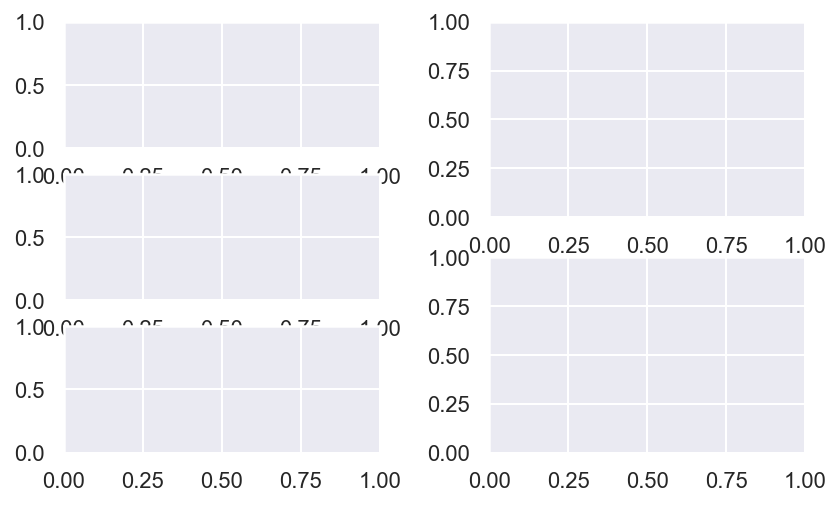

In [67]:
fig = plt.figure()
gs = fig.add_gridspec(1, 2)

gs0 = gs[0].subgridspec(3, 1)
gs1 = gs[1].subgridspec(2, 1)

ax1=fig.add_subplot(gs0[0, 0])
ax2=fig.add_subplot(gs0[1, 0])
ax3=fig.add_subplot(gs0[2, 0])
ax4=fig.add_subplot(gs1[0, 0])
ax5=fig.add_subplot(gs1[1, 0])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Exercises

1) To plot the following, use 5 color/ 5 font / 5label/ 5 title

<img src="ex.png" width="600">

#### Axes 1: Plot Sin(x)
#### Axes 2 : Plot Cos(x)
#### Axes 3: A Line plot
#### Axes 4: Plot hist(random noraml) 
#### Axes 5: Plot Scatter

In [ ]:
### First method: using add_subplots
import matplotlib.gridspec as gridspec

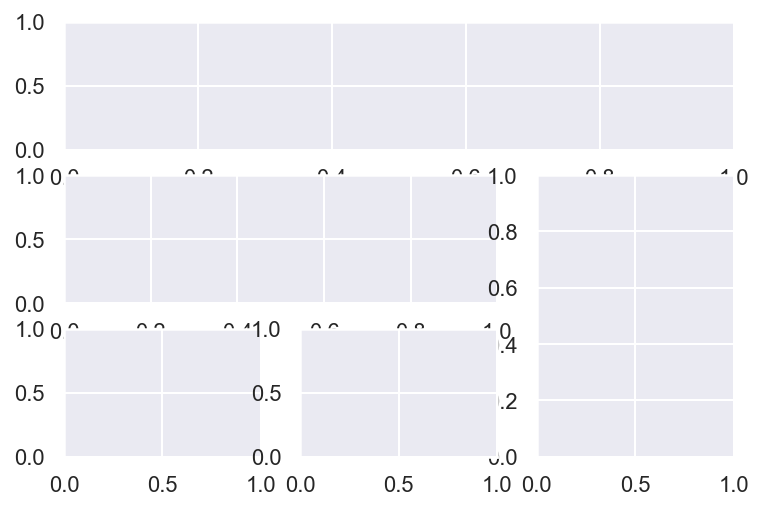

In [57]:
### second method gridspec: using subplot2grid

gridsize=(3,3)

ax1=plt.subplot2grid(gridsize, (0,0), colspan=3)
ax2=plt.subplot2grid(gridsize, (1,0), colspan=2)
ax3=plt.subplot2grid(gridsize, (1,2), rowspan=2)
ax4=plt.subplot2grid(gridsize, (2,0))
ax5=plt.subplot2grid(gridsize, (2,1))

2) Generate an `np.array` of normally distributed samples and plot them using the histogram function.  Overlay with a 2D plot of the standard normal PDF function.  What happens as the number of random samples increases? Can you use different color to indicate the bins with 5 and 95 percentile?